## Sprint6_k-means_スクラッチ
### この課題の目的
1.コーディング力を向上させる  2.全体の構造を意識したコーディングをする  3.スクラッチを通してK-meansを理解する  4.クラスタ分析を行う

### データセットの用意

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 小規模なデータの用意

In [2]:
from sklearn.datasets import make_blobs

#　n_samples:サンプル数
# n_features：特徴量（説明変数）の数
# centers:クラスタの数　
# cluster_std:クラスタ内の標準偏差（ばらつき度合い）　
# shuffle:サンプルをシャッフル　
# random_state:乱数生成を固定

X, _ = make_blobs(n_samples =100,\
                  n_features=2, \
                  centers=4, \
                  cluster_std=0.5, \
                  shuffle=True, \
                  random_state=0)

In [3]:
X

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725],
       [ 0.78260667,  4.15263595],
       [-1.95751686,  3.87291474],
       [-0.77354537,  7.87923564],
       [ 0.12313498,  5.27917503],
       [-1.43284669,  7.71577043],
       [-0.92819001,  7.02698199],
       [-1.74836345,  7.06307447],
       [-1.26789718,  7.25141327],
       [-0.98661744,  7.74968685],
       [-0.81984047,  7.50994722],
       [ 2.99684287,  0.22378413],
       [ 1.46870582,  1.86947425],
       [-0.33533163,  3.390122  ],
       [-1.86407034,  2.93379754],
       [ 2.62496786,  0.28025075],
       [ 2.11114739,  3.57660449],
       [-1.8219901 ,  7.61654999],
       [-1.91186205,  3.18750686],
       [ 2.28809874,  0.12954182],
       [ 0.5285368 ,  4.49723858],
       [-1.57613028,  2.58614312],
       [-0.565433  ,  3.65813966],
       [ 0.802314  ,  4.38196181],
       [ 2.79939362,

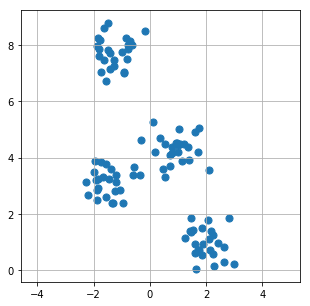

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize =(5,5))
plt.scatter(X[:,0], X[:,1], marker='o', s=50)
plt.axis('equal')
plt.grid()
plt.show()


In [5]:
label = np.random.randint(0,4,100)   # 初期のラベルを作る

In [6]:
label.shape

(100,)

In [7]:
label

array([2, 1, 1, 3, 0, 2, 1, 0, 2, 0, 2, 0, 3, 0, 3, 2, 2, 0, 2, 1, 0, 3, 2,
       2, 2, 2, 3, 3, 1, 0, 0, 0, 3, 2, 3, 3, 3, 0, 3, 1, 1, 1, 3, 1, 0, 3,
       3, 1, 0, 1, 0, 0, 2, 3, 0, 0, 0, 1, 2, 3, 0, 1, 3, 0, 0, 1, 3, 2, 2,
       0, 3, 3, 3, 3, 2, 0, 3, 3, 1, 3, 2, 2, 1, 0, 2, 2, 0, 2, 1, 2, 0, 0,
       2, 3, 1, 2, 2, 3, 2, 1])

### K-meansのクラスを作成する
K-meansのクラスScratchKMeansを作成する

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# K-meansのクラス
class ScratchKMeans:
    
    def __init__(self, cluster, iteration):
        self.cluster = cluster
        self.iteration = iteration

    
    # 中心点表を作成する関数
    def _get_center_point(self, X):
        
        # 中心点表を初期化する
        self.center_point_list = []

        for i in np.unique(self.label):

            # X0軸方向の平均
            X0_sum = X[self.label == i][:, 0].sum()
            X0_cnt = len(X[self.label == i])
            X0_point = X0_sum / X0_cnt

            # X1軸方向の平均
            X1_sum = X[self.label == i][:, 1].sum()
            X1_cnt = len(X[self.label == i])
            X1_point = X1_sum / X1_cnt

            # 中心点（重心）を求める
            center_point = [X0_point, X1_point]

            # 中心点表を作成（更新）する
            self.center_point_list.append(center_point)
    
    # 中心点と全データとの距離を求める関数
    def _get_distance(self, X):
        
        # 中心点表を更新
        self._get_center_point(X)
        
        # 距離表の枠を作成
        distance_list = np.zeros((len(X), len(self.center_point_list)))
        
        for i, values in enumerate(self.center_point_list):

            # 重心と全データとの距離表を作成
            for j in range(len(X)):
                
                diff = values - X[j]
                distance = np.linalg.norm(diff)
                distance_list[j, i] = distance
                
        return distance_list
    
    # 学習する
    def fit(self, X):
        
        self.label = np.random.randint(0, self.cluster, len(X))
        
        # 全データの一番近いクラスタラベルをゲット出来たので、
        # 新しいクラスラベルの値へ、古いクラスラベルを更新してあげる
        for i in range(self.iteration):
            
            # 距離表で、それぞれのXで最初のクラスラベルのインデックスを取得
            # そのインデックスは、クラスタラベルに等しい
            self.label = np.argmin(self._get_distance(X), axis=1)
            
            # 今時点の中心点を保持しておく
            pre_center_point_list = self.center_point_list
            
            # クラスタラベルを最新
            self.label = np.argmin(self._get_distance(X), axis=1)
            
            # 前後で中心点を比較
            if pre_center_point_list == self.center_point_list:
                #print("---学習終了しました---",i*2,"イテレーション回数")
                break
    
    # エルボー法 誤差平方和SSE
    # 重心座標はfitで取得出来ているので、それを使って、
    # クラスタ数が変化した時のSSEの変化度を取得する関数
    def elbow(self, X, cluster):
        self.cluster = cluster
        self.label = np.random.randint(0, self.cluster, len(X))
        
        # SSE_list
        sse_list = []
        
        # クラスタ数をパラメータとしてfitさせる
        for n in range(self.cluster):
            
            self.cluster = n + 1
            
            # クラスタラベルを作成
            self.label = np.random.randint(0, self.cluster, len(X))
            
            # 学習
            self.fit(X)
        
            # |Xn - μk||**2の枠を作成
            elbow_list = np.zeros((len(X), len(self.center_point_list)))
            
            for i, values in enumerate(self.center_point_list):

                # ||Xn - μk||**2の表を作成する
                for j in range(len(X)):    
                    elbow_diff = X[j] - values
                    
                    # ドット積でやり方
                    #elbow_list[j, i] = np.dot(elbow_diff, elbow_diff.T)
                    
                    # ノルムを取って二乗するやり方
                    elbow_list[j, i] = np.linalg.norm(elbow_diff)**2

            # 最小値を取得
            elbow_list_min = elbow_list.min(axis=1)

            # SSEを算出
            sse = elbow_list_min.sum()
            sse_list.append(sse)
            
        return sse_list

In [11]:
# クラスを実行
skm = ScratchKMeans(cluster=4, iteration = 10)
skm.fit(X)
skm.center_point_list

[[0.92578446520713376, 4.3247579195037584],
 [-1.2681173257461036, 7.7637826560024017],
 [-1.4793567922695052, 3.1171689610225979],
 [1.9918690296485415, 0.96561070961077933]]

### sklearnでの比較

In [12]:
# sklearnの K-means法の結果と比較　。結果は同じであった
from sklearn.cluster import KMeans
km  = KMeans(n_clusters=4, random_state=0)
km.fit(X)
km.cluster_centers_

array([[-1.47935679,  3.11716896],
       [-1.26811733,  7.76378266],
       [ 1.99186903,  0.96561071],
       [ 0.92578447,  4.32475792]])

### クラスタリングの可視化

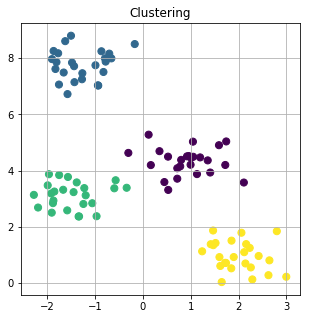

In [14]:
plt.figure(figsize =(5,5))
plt.title('Clustering')
plt.scatter(X[:,0], X[:,1], c=skm.label , marker='o', s=50)
plt.grid()


### エルボー法

In [15]:
skm2 = ScratchKMeans(cluster=4, iteration = 10)
skm2.elbow(X, 10)
sse = skm2.elbow(X, 10)

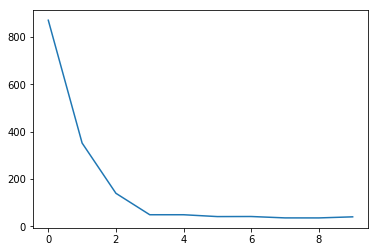

In [16]:
# 描写
plt.plot(range(0,10), sse)
plt.show()